## 시각화 및 데이터 분석

2021.08.24(화)

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# import random undersampling and other necessary libraries 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
df = pd.read_csv("insurancedata.csv")
print(df.shape)
print(df.head())

(7626, 17)
   Unnamed: 0 SIU_CUST_YN  SEX  AGE FP_CAREER  OCCP_GRP  TOTALPREM  \
0           0           N    2    4         N         1         14   
1           1           N    1    6         N        11          2   
2           2           N    1    5         Y         2         15   
3           3           N    1    5         N        17         13   
4           4           N    1    5         N         1          3   

   MAIN_INSR_AMT_SUM  EXPR_SUM  WORK_YEARS_MIN  EXPR_COUNT  DMND_AMT_SUM  \
0          120266433         0               0           8        141450   
1            5000000         0               1           1       1390000   
2         1797991770        22               1          24       2480000   
3          212274240         3               1           6         72320   
4           75256800         3              13           4       1300000   

   CLAIM_CNT  TOTAL_VLID_HOSP_OTDA  HOSP_VARIES  HOSP_DVSN_VARIES  \
0          4                     5        

## N : 0 / Y : 1 의 각각 비율 확인

In [4]:
df.SIU_CUST_YN.value_counts()

N    6901
Y     725
Name: SIU_CUST_YN, dtype: int64

N    90.49305
Y     9.50695
Name: SIU_CUST_YN, dtype: float64


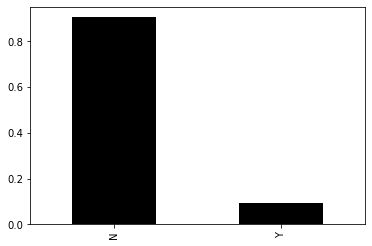

In [5]:
df.SIU_CUST_YN.value_counts(normalize=True).plot(kind='bar', color = "black")
print(df.SIU_CUST_YN.value_counts(normalize=True)*100)

## 데이터 추가정제

데이터에 맞춰서 하나만 실행

In [6]:
#insurance data

df['SIU_CUST_YN'].replace('N', 0, inplace = True)
df['SIU_CUST_YN'].replace('Y', 1, inplace = True)
df['FP_CAREER'].replace('N', 0, inplace = True)
df['FP_CAREER'].replace('Y', 1, inplace = True)
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.drop(['EXPR_SUM'], axis=1, inplace = True)
df.drop(['TOTALPREM'], axis=1, inplace = True)

In [7]:
df.head()

,SIU_CUST_YN,SEX,AGE,FP_CAREER,OCCP_GRP,MAIN_INSR_AMT_SUM,WORK_YEARS_MIN,EXPR_COUNT,DMND_AMT_SUM,CLAIM_CNT,TOTAL_VLID_HOSP_OTDA,HOSP_VARIES,HOSP_DVSN_VARIES,CHME_LICE_COUNT
0,0,2,4,0,1,120266433,0,8,141450,4,5,2,2,1
1,0,1,6,0,11,5000000,1,1,1390000,3,6,3,2,3
2,0,1,5,1,2,1797991770,1,24,2480000,10,21,4,3,4
3,0,1,5,0,17,212274240,1,6,72320,1,5,1,1,1
4,0,1,5,0,1,75256800,13,4,1300000,4,26,2,2,2


In [8]:
X = df.iloc[:,1:] # SIU_CUST_YN을 제외한 모든 cloumn
y = df.iloc[:,0] # SIU_CUST_YN

In [9]:
# 데이터에 StartifiedKFold를 적용하기 위해서 nd.array형태로 데이터 변환
X = X.to_numpy()
print(type(X))

<class 'numpy.ndarray'>


4
TRAIN: [1899 1900 1901 ... 7623 7624 7625] TEST: [   0    1    2 ... 1940 1942 1943]
Before Sampling:  Counter({0: 5175, 1: 544})
After oversampling(ADASYN):  Counter({0: 5175, 1: 5175})
score = 0.8715259570005244
coef = [[-7.31578879e-05 -4.23620294e-01 -1.44890115e-01 -1.05743591e-01
   4.28712836e-01 -1.66355384e-01 -1.84214751e-01  6.53469422e-01
  -5.31303607e-01  3.39808074e+00 -3.52523476e-01  1.10966188e-01
   8.21543096e-01]]
x_result = [[0.87706643 0.12293357]
 [0.93261152 0.06738848]
 [0.54050775 0.45949225]
 ...
 [0.21093991 0.78906009]
 [0.7148357  0.2851643 ]
 [0.05363171 0.94636829]]
result
---------------------------
accuracy: 0.87
precision: 0.38
recall: 0.55
F1: 0.45


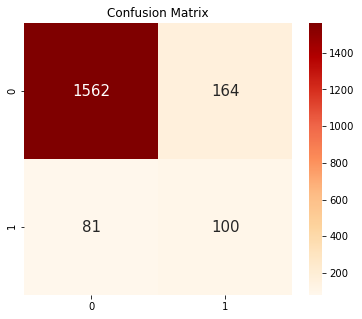

TRAIN: [   0    1    2 ... 7623 7624 7625] TEST: [1899 1900 1901 ... 4041 4054 4058]
Before Sampling:  Counter({0: 5176, 1: 543})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8914525432616676
coef = [[-0.02612822 -0.44820752 -0.2599419  -0.22618507  0.36877551 -0.20309525
  -0.22062877  0.13190971 -1.00270209  3.07452899  1.91333812 -0.60556838
   0.36399106]]
x_result = [[0.89247345 0.10752655]
 [0.55417399 0.44582601]
 [0.85353877 0.14646123]
 ...
 [0.32552244 0.67447756]
 [0.28478197 0.71521803]
 [0.378313   0.621687  ]]
result
---------------------------
accuracy: 0.89
precision: 0.45
recall: 0.64
F1: 0.53


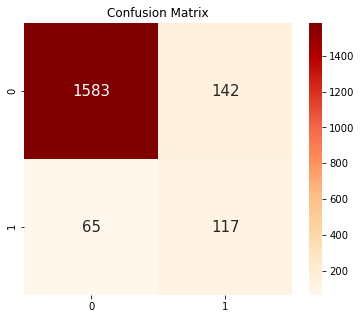

TRAIN: [   0    1    2 ... 7623 7624 7625] TEST: [3782 3783 3784 ... 5804 5815 5820]
Before Sampling:  Counter({0: 5176, 1: 544})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8793284365162645
coef = [[-0.1671069  -0.44486451 -0.03207781 -0.1855444   0.38658395 -0.09012855
  -0.1621682   0.92610279 -1.59130589  3.65112339 -0.11875423 -0.05605234
   1.8283001 ]]
x_result = [[6.65384013e-01 3.34615987e-01]
 [7.78362983e-01 2.21637017e-01]
 [8.14470513e-01 1.85529487e-01]
 ...
 [2.61270456e-01 7.38729544e-01]
 [1.58671788e-06 9.99998413e-01]
 [7.45958761e-01 2.54041239e-01]]
result
---------------------------
accuracy: 0.88
precision: 0.40
recall: 0.53
F1: 0.45


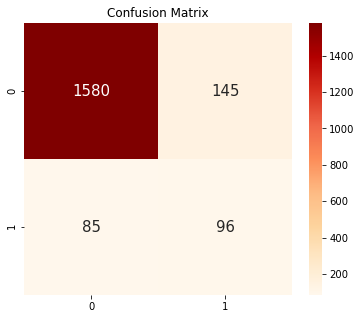

TRAIN: [   0    1    2 ... 5804 5815 5820] TEST: [5710 5711 5712 ... 7623 7624 7625]
Before Sampling:  Counter({0: 5176, 1: 544})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8856243441762854
coef = [[-0.12803534 -0.51305047  0.02903703 -0.18964134  0.35620272 -0.11036259
  -0.11234577  0.02921453 -1.06792919  4.58050303 -0.04163617 -0.11424218
   1.33289907]]
x_result = [[0.89141284 0.10858716]
 [0.91746304 0.08253696]
 [0.59024537 0.40975463]
 ...
 [0.93208449 0.06791551]
 [0.86675555 0.13324445]
 [0.18863911 0.81136089]]
result
---------------------------
accuracy: 0.89
precision: 0.42
recall: 0.56
F1: 0.48


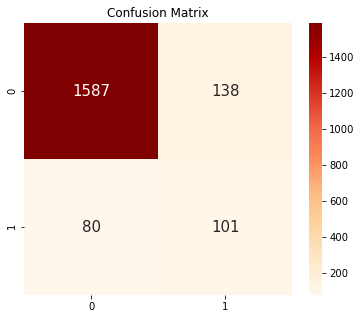

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from collections import Counter
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

model = LogisticRegression()

SK_fold = StratifiedKFold(n_splits=4)
print(SK_fold.get_n_splits(df, df['SIU_CUST_YN']))

result_data = []
answers=[]
result_y = []


accuracy = []
precision = []
recall = []
fscore = []
train_idx = []
test_idx = []

for train_index, test_index in SK_fold.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_idx.append(train_index)
    test_idx.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #SVMSOMTE -> 오버샘플링 기법
    SVMSOMTE = SVMSMOTE()
    X_train_SVMSOMTE, y_train_SVMSOMTE = SVMSOMTE.fit_resample(X_train, y_train)
    
    print("Before Sampling: ",Counter(y_train))
    print("After oversampling(ADASYN): ",Counter(y_train_SVMSOMTE))
    
    # 해당 변수를 설정해서 Sampling 방식 선택 후 머신러닝 실행
    X_train_sampling = X_train_SVMSOMTE
    y_train_sampling = y_train_SVMSOMTE
    
    scaler = StandardScaler()
    X_train_sampling = scaler.fit_transform(X_train_sampling)
    X_test = scaler.transform(X_test)
    
    # 학습 알고리즘 예시 (LogisticRegressiong - 로지스틱 회귀분석)
    model.fit(X_train_sampling, y_train_sampling)
    
    # sklearn에서 제공하는 score값
    print('score =', model.score(X_test, y_test))
    
    # 각 속성별 가중치 -> 절대값으로 보면됨.
    print('coef =', model.coef_)
    
    print('x_result =', model.predict_proba(X_test))
    
    
    result_data.append(model.predict_proba(X_test)[:,1:])
    answers.append(y_test)
    
    predict_X = model.predict(X_test)
    result_y.append(model.predict(X_test))
    
    print('result')
    print("---------------------------")
    print('accuracy: %.2f' % accuracy_score(y_test, predict_X))
    print('precision: %.2f' % precision_score(y_test, predict_X))
    print('recall: %.2f' % recall_score(y_test, predict_X))
    print('F1: %.2f' % f1_score(y_test, predict_X))
    
    
    accuracy.append(accuracy_score(y_test, predict_X))
    precision.append(precision_score(y_test, predict_X))
    recall.append(recall_score(y_test, predict_X))
    fscore.append(f1_score(y_test, predict_X))
    
    import seaborn as sns
    confusion = confusion_matrix(y_true = y_test
                             , y_pred = predict_X)

    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
    plt.title('Confusion Matrix')
    plt.show()

## 교차검증 평균 값

In [11]:
import itertools
answers = list(itertools.chain.from_iterable(answers))
result_y = list(itertools.chain.from_iterable(result_y))

In [12]:
confusion = confusion_matrix(y_true = result_y
                             , y_pred = answers)

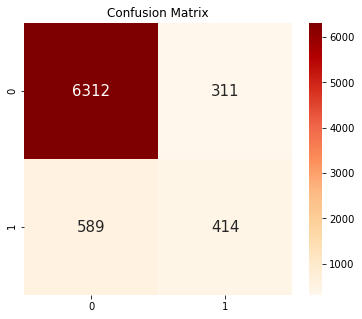

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print('mean')
print("---------------------------")
print('accuracy: %.2f' % (sum(accuracy)/len(accuracy)))
print('precision: %.2f' % (sum(precision)/len(precision)))
print('recall: %.2f' % (sum(recall)/len(recall)))
print('F1: %.2f' % (sum(fscore)/len(fscore)))

mean
---------------------------
accuracy: 0.88
precision: 0.41
recall: 0.57
F1: 0.48


## 데이터 확인 및 정제

In [15]:
result_data = list(itertools.chain.from_iterable(result_data))
result_data = list(map(float, result_data))

In [16]:
# datas => 정답여부 
# test_idx => test_index의 index number
# answers => y_test(정답)
# result_data => train 후 test_X를 활용해 예측된 결과값

datas = []
for i in range(len(answers)):
    if answers[i] == 1:
        if result_data[i] >=0.5:
            datas.append(1)
        else :
            datas.append(0)
            
    elif answers[i] == 0:
        if result_data[i] <0.5:
            datas.append(1)
        else :
            datas.append(0)
        

In [17]:
status = []
for i in range(len(answers)):
    if result_data[i] <0.5:
        status.append('주의')
    elif result_data[i] <0.7:
        status.append('경계')
    else:
        status.append('위험')
            

In [18]:
print(len(answers), len(result_data), len(datas), len(status))

7626 7626 7626 7626


In [19]:
print(type(answers), type(answers[0]))
print(type(result_data), type(result_data[0]))
print(type(datas), type(datas[0]))
print(type(status), type(status[0]))

<class 'list'> <class 'int'>
<class 'list'> <class 'float'>
<class 'list'> <class 'int'>
<class 'list'> <class 'str'>


In [20]:
df_result = pd.DataFrame({'answers':answers,'result_data':result_data,'datas':datas, 'status':status})

In [21]:
df_result
# column 조치사항 '주의'(0.0~0.5),'경계'(0.5~0.7),'위험'(0,7~1.0)

,answers,result_data,datas,status
0,0,0.122934,1,주의
1,0,0.067388,1,주의
2,0,0.459492,1,주의
3,0,0.083928,1,주의
4,0,0.109198,1,주의
...,...,...,...,...
7621,0,0.147127,1,주의
7622,0,0.137403,1,주의
7623,0,0.067916,1,주의
7624,0,0.133244,1,주의


In [22]:
df_result.to_csv('result.csv')

## 결과 데이터 정제

In [23]:
y1 = np.array([0 for i in range(10)])
count = 0
for i in df_result['datas']:
    if i==1 and df_result['result_data'][count] < 0.1 :
        y1[0] +=1
    elif i==1 and df_result['result_data'][count] < 0.2 :
        y1[1] +=1
    elif i==1 and df_result['result_data'][count] < 0.3 :
        y1[2] +=1
    elif i==1 and df_result['result_data'][count] < 0.4 :
        y1[3] +=1
    elif i==1 and df_result['result_data'][count] < 0.5 :
        y1[4] +=1
    elif i==1 and df_result['result_data'][count] < 0.6 :
        y1[5] +=1
    elif i==1 and df_result['result_data'][count] < 0.7 :
        y1[6] +=1
    elif i==1 and df_result['result_data'][count] < 0.8 :
        y1[7] +=1
    elif i==1 and df_result['result_data'][count] < 0.9 :
        y1[8] +=1
    elif i==1 and df_result['result_data'][count] <= 1 :
        y1[9] +=1
    count+=1

In [24]:
y3 = np.array([0 for i in range(10)])
count = 0
for i in df_result['datas']:
    if i==0 and df_result['result_data'][count] < 0.1 :
        y3[0] +=1
    elif i==0 and df_result['result_data'][count] < 0.2 :
        y3[1] +=1
    elif i==0 and df_result['result_data'][count] < 0.3 :
        y3[2] +=1
    elif i==0 and df_result['result_data'][count] < 0.4 :
        y3[3] +=1
    elif i==0 and df_result['result_data'][count] < 0.5 :
        y3[4] +=1
    elif i==0 and df_result['result_data'][count] < 0.6 :
        y3[5] +=1
    elif i==0 and df_result['result_data'][count] < 0.7 :
        y3[6] +=1
    elif i==0 and df_result['result_data'][count] < 0.8 :
        y3[7] +=1
    elif i==0 and df_result['result_data'][count] < 0.9 :
        y3[8] +=1
    elif i==0 and df_result['result_data'][count] <= 1 :
        y3[9] +=1
    count+=1

In [25]:
y2 =  np.array([0 for i in range(10)])
count = 0
for i in df_result['datas']:
    if df_result['result_data'][count] < 0.1 :
        y2[0] +=1
    elif df_result['result_data'][count] < 0.2 :
        y2[1] +=1
    elif df_result['result_data'][count] < 0.3 :
        y2[2] +=1
    elif df_result['result_data'][count] < 0.4 :
        y2[3]+=1
    elif df_result['result_data'][count] < 0.5 :
        y2[4] +=1
    elif df_result['result_data'][count] < 0.6 :
        y2[5] +=1
    elif df_result['result_data'][count] < 0.7 :
        y2[6] +=1
    elif df_result['result_data'][count] < 0.8 :
        y2[7] +=1
    elif df_result['result_data'][count] < 0.9 :
        y2[8] +=1
    elif df_result['result_data'][count] <= 1:
        y2[9] +=1
    count+=1

In [26]:
df = pd.DataFrame({'correct':y1,'all':y2,'wrong':y3})

## 데이터 시각화

In [27]:
x =  np.array([i for i in range(10)])

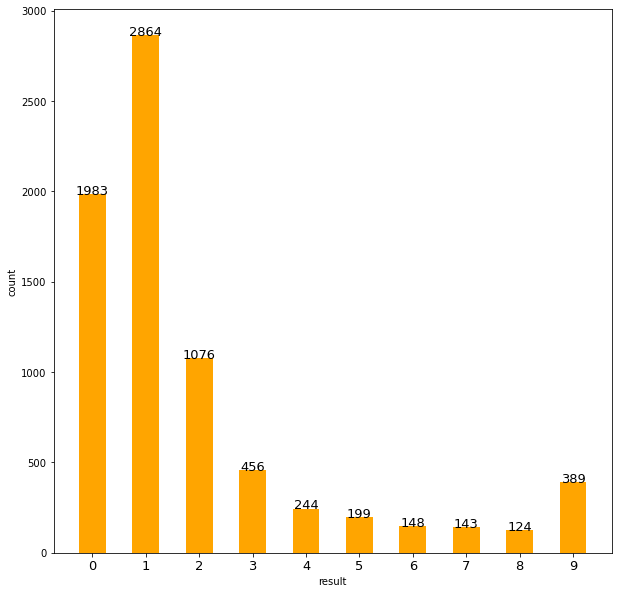

In [28]:
# 예측한 전체 데이터 갯수

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y2, width=0.5, color = 'orange')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y2[i],ha='center',fontsize=13)
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

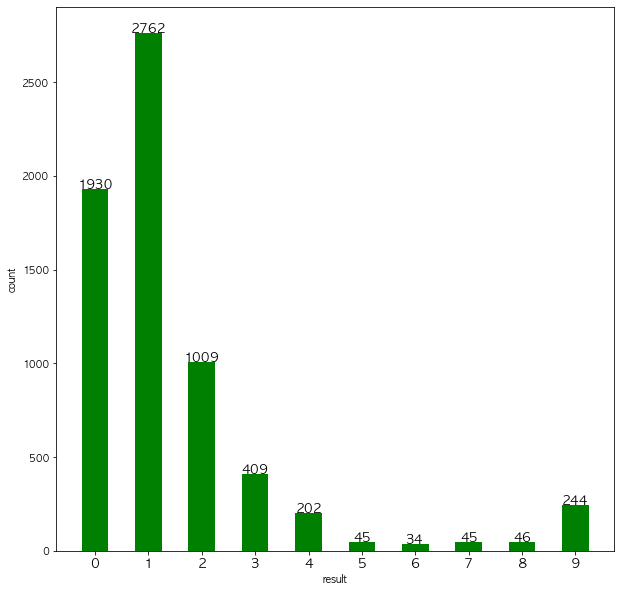

In [32]:
# 정답 갯수

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y1, width=0.5, color ='green')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y1[i],ha='center',fontsize=13)
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

In [ ]:
# 오답 갯수

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y3, width=0.5, color ='blue')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y3[i],ha='center',fontsize=13)
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

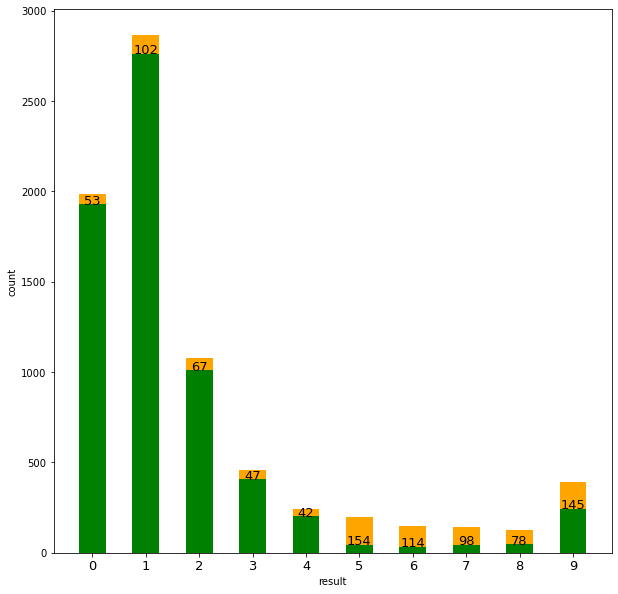

In [30]:
import matplotlib.pyplot as plt
# 주황으로 보이는 부분이 오답이라고 생각하면 됨.

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y2, width=0.5, color = 'orange')
bars2 = plt.bar(x,y1, width=0.5, color ='green')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars2):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y2[i]-y1[i],ha='center',fontsize=13)
    
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

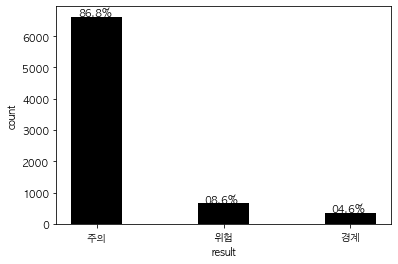

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

# 주황으로 보이는 부분이 오답이라고 생각하면 됨.
bins = np.arange(4) - 0.5
ys, xs, patches = plt.hist(df_result['status'], color = 'black',bins=bins, rwidth=0.4,)
for i in range(0, len(ys)):
    ## 앞에서 plt.hist 가 리턴하는 값이 bar의 x, y좌표이기 때문에 
    ## 이 값을 이용해서 글자를 어디에 넣을지 결정해줌. 
    plt.text(x=xs[i]+0.35, y=ys[i]+0.015, 
             s='{:0>4.1f}%'.format(ys[i]/len(df_result)*100), ## 넣을 스트링
             fontsize=10,## 크기 
             color='black',)
plt.xlabel('result')
plt.xticks(['주의','경계','위험'])
plt.ylabel('count')
plt.show()
